In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
INPUT_NODE = 60
OUTPUT_NODE = 2

#梯度下降率
GDDOWN = 0.000001

#训练轮数
TRAINING_TIMES = 200

#每次训练数量
TRAINING_STEPS = 100

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 各个变量
x = tf.placeholder("float", shape=[None, INPUT_NODE])
y_ = tf.placeholder("float", shape=[None,OUTPUT_NODE])

W = tf.Variable(tf.zeros([INPUT_NODE, OUTPUT_NODE]))
b = tf.Variable(tf.zeros([OUTPUT_NODE]))

# 变量初始化
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)

# 初始化图
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 优化算法
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step =tf.train.GradientDescentOptimizer(GDDOWN).minimize(cross_entropy)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('sonar/sonar.all-data', header = None)
df=df.replace('R',0)
df=df.replace('M',1)
data=df.values
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(data[:,0:60],data[:,60], test_size=test_size, random_state=seed)

y_train = tf.one_hot(y_train,2)
y_test = tf.one_hot(y_test,2)
sess1=tf.Session()
y_train, y_test = sess1.run([y_train,y_test])

In [4]:
history={'accuracy':[],'f_score':[]}

In [5]:
from sklearn.metrics import f1_score
for i in range(TRAINING_TIMES):
    # 训练
    batch_xs= X_train[i*TRAINING_STEPS:(i+1)*TRAINING_STEPS,:]
    batch_ys= y_train[i*TRAINING_STEPS:(i+1)*TRAINING_STEPS]
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    # 模型评估
    correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_, 1))
    accuracy =tf.reduce_mean(tf.cast(correct_prediction, "float"))
    pred = tf.argmax(y_, 1)
    true=tf.argmax(y,1)
    j = i+1
    print("第%d轮训练,训练个数%d个" % (j,j*TRAINING_STEPS))
    #print("正确率预测： " + correct_prediction + "\n")
    test_acc,y_pred,y_true=sess.run([accuracy,pred,true],feed_dict={x: X_test, y_:y_test})
    model_f1_score=f1_score(y_true,y_pred,average='micro')
    print( 'f1_score= "{:.9f}"'.format(model_f1_score))
    print("当前正确率： ")
    print(test_acc)
    history['f_score'].append(model_f1_score)
    history['accuracy'].append(test_acc)

第1轮训练,训练个数100个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第2轮训练,训练个数200个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第3轮训练,训练个数300个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第4轮训练,训练个数400个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第5轮训练,训练个数500个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第6轮训练,训练个数600个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第7轮训练,训练个数700个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第8轮训练,训练个数800个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第9轮训练,训练个数900个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第10轮训练,训练个数1000个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第11轮训练,训练个数1100个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第12轮训练,训练个数1200个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第13轮训练,训练个数1300个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第14轮训练,训练个数1400个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第15轮训练,训练个数1500个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第16轮训练,训练个数1600个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第17轮训练,训练个数1700个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第18轮训练,训练个数1800

f1_score= "0.550724638"
当前正确率： 
0.5507246
第140轮训练,训练个数14000个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第141轮训练,训练个数14100个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第142轮训练,训练个数14200个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第143轮训练,训练个数14300个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第144轮训练,训练个数14400个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第145轮训练,训练个数14500个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第146轮训练,训练个数14600个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第147轮训练,训练个数14700个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第148轮训练,训练个数14800个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第149轮训练,训练个数14900个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第150轮训练,训练个数15000个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第151轮训练,训练个数15100个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第152轮训练,训练个数15200个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第153轮训练,训练个数15300个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第154轮训练,训练个数15400个
f1_score= "0.550724638"
当前正确率： 
0.5507246
第155轮训练,训练个数15500个
f1_score= "0.550724638"


In [6]:
# 构造绘图函数
from matplotlib import pyplot as plt
def drow(history):
    plt.figure()
    epochs = range(1, len(history['accuracy']) + 1)
    plt.plot(epochs, history['accuracy'], 'rx', label='accuracy')
    plt.plot(epochs, history['f_score'], 'b', label='f1_score')
    plt.title('acc and f1_score')
    plt.xlabel('Epochs')
    plt.ylabel('acc/f1_score')
    plt.legend()
    plt.show()

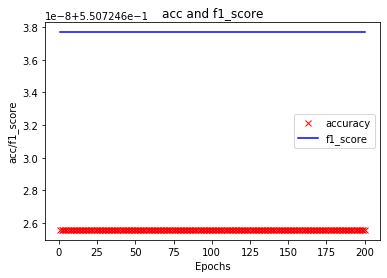

In [7]:
drow(history)